# Scattered map

## 1. import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import folium
import json

In [2]:
# path for the data
fpath = r'C:\Users\Mei\City-Bikes'

In [3]:
# path for the json file
jpath = r'C:\Users\Mei\City-Bikes\63_example\us-states.json'

In [4]:
# import the data
df = pd.read_pickle(os.path.join(fpath,'clean_data','citibike_clean_1.pkl'))

In [5]:
# import join file for us
f = open(r'C:\Users\Mei\City-Bikes\63_example\us-states.json')
# return json object as a dictionary
data = json.load(f)

# iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## 2. wrangling data

In [6]:
df.head(5)

trip_id bike_id weekday  start_hour          start_time start_station_id  \
0  LnQzQk   16013     Mon          18 2013-09-09 18:18:55              523   
1  IL9boN   15230     Thu          18 2013-09-12 18:38:53              257   
2  46clGB   17942     Wed          19 2013-09-18 19:44:04              479   
3  v7vdFt   19683     Sat          11 2013-09-28 11:54:37              527   
4  VGBsb5   18024     Sat          18 2013-09-07 18:08:22              521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

             end_time end_station_id     end_station_name  \
0 2013-09-09 18:35:28            334      W 20 St & 7 Ave   
1 2013-09-12 18:48:34            236  St Marks Pl & 2 Ave   
2 2013-09-18 19:50:05            513     W 56 St & 10 Ave   
3 2013-09-28 12:03:58            441      E 52 St & 2 Ave   
4 2013-09-07 18:46:38            476      E 31 St & 3 Ave   

   end_station_latitude  end_station_longitude  trip_duration      subscriber  \
0             40.742388             -73.997262            993      Subscriber   
1             40.728419             -73.987140            581      Subscriber   
2             40.768254             -73.988639            361      Subscriber   
3             40.756014             -73.967416            561      Subscriber   
4             40.743943             -73.979661           2296  Non-Subscriber   

   birth_year gender  
0      1968.0      2  
1      1983.0      1  
2      1989.0      1  
3      1988.0      2  
4         NaN      0

### Extrem data

<AxesSubplot:ylabel='Frequency'>

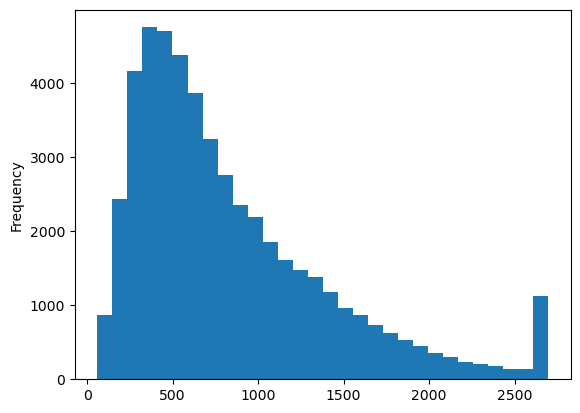

In [7]:
df['trip_duration'].plot.hist(bins = 30)

In [8]:
df_keep = df[df['trip_duration'] <= 2500]

<AxesSubplot:ylabel='Frequency'>

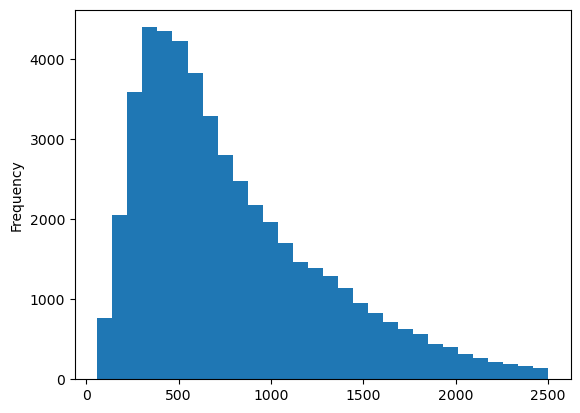

In [9]:
df_keep['trip_duration'].plot.hist(bins = 30)

In [10]:
df.shape

(50000, 18)

In [11]:
df_keep.shape

(48715, 18)

# example
## scatterplot map

In [12]:
import matplotlib.pyplot as pltt

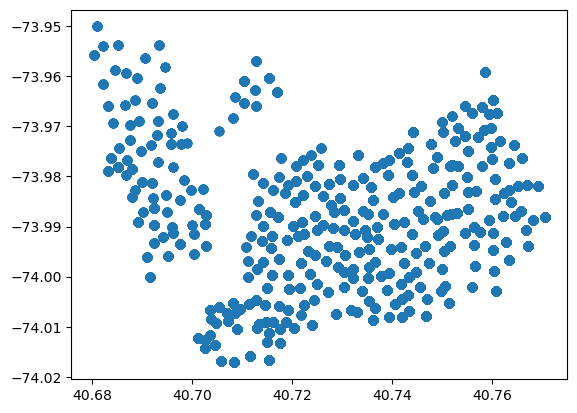

In [13]:
pltt.scatter(x = df_keep['start_station_latitude'], y = df_keep['start_station_longitude'])
pltt.rcParams["figure.figsize"] =[50,35]
pltt.show()

## geo_scatterplot
    - I don't know how to zoom the part that shows the corresponding data

In [14]:
import plotly.graph_objects as go

In [30]:
fig = go.Figure(data = go.Scattergeo(lon =df['start_station_longitude'], lat = df['start_station_latitude'],
                                     mode ='markers'))

In [32]:
fig.update_layout( title ='New York',height=500, margin={"r":0,"t":0,"l":0,"b":0},
                 geo_scope = 'usa')

fig.show()

In [33]:
fig = go.Figure(go.Scattergeo(lon =df['start_station_longitude'], lat = df['start_station_latitude'],
                                     mode ='markers'))
fig.update_geos(
    center=dict(lon=-74, lat=40),projection_scale = 5,
    lataxis_range=[40,50], lonaxis_range=[-75, -60]
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()